The Georgia Birds and the Michigan Felines play a game where they flip a fair coin 101 times. In the end, if heads comes up at least 51 times, the Birds win; but if tails comes up at least 51 times, the Felines win.

What’s the probability that the Birds have at least a 99 percent chance of winning at some point during the game — meaning their probability of victory is 99 percent or greater given the flips that remain — and then proceed to lose?

Extra credit: Instead of 101 total flips, suppose there are many, many more (i.e., consider the limit as the number of flips goes to infinity). Again, the Birds win if heads comes up at least half the time. Now what’s the probability that the Birds have a win probability of at least 99 percent at some point and then proceed to lose?

In [1]:
from scipy.linalg import pascal
from scipy.special import comb

In [2]:
def win_prob(heads_required, flips_left):
    prob = sum(pascal(flips_left + 1, kind='lower')[-1][heads_required:]) / (2 ** flips_left)
    return prob

In [3]:
TURNS = 101
THRESHOLD = 0.99
turn_perms = {}

# one way to throw a coin zero times
turn_perms[0] = [1]

# calculate ways to throw a coin N times without going above THRESHOLD probability of winning
for turn in range(1, TURNS+1):
    last_turn = turn_perms[turn-1]
    max_heads_last_turn = len(last_turn) - 1
    turn_perms[turn] = []
    for n_heads in range(len(last_turn)+1):
        if n_heads > max_heads_last_turn and win_prob(TURNS // 2 + 1 - n_heads, TURNS - turn) > THRESHOLD:
            break
        turn_perms[turn].append(sum(last_turn[max(n_heads-1,0):n_heads+1]))

In [4]:
possible_games = 2 ** TURNS
ways_to_lose = possible_games / 2
ways_to_lose_without_blowing_a_lead = sum(turn_perms[TURNS])
ways_to_blow_a_lead = ways_to_lose - ways_to_lose_without_blowing_a_lead
prob_of_blowing_a_lead = ways_to_blow_a_lead / possible_games
prob_of_blowing_a_lead

0.002117155741949872

# Ex

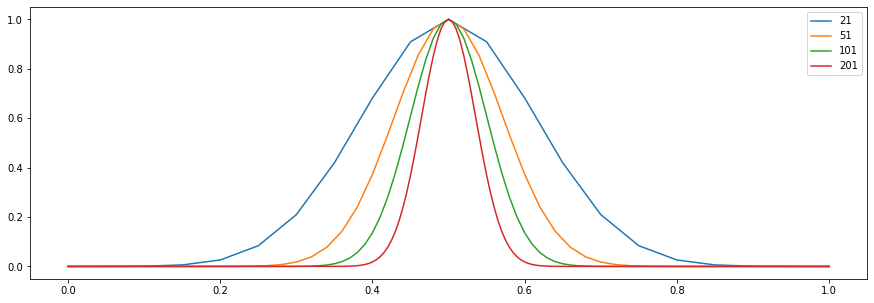

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = 40
p = pascal(x, kind='lower')[-1]

fig, ax = plt.subplots(figsize=(15,5))
for x in [21, 51, 101, 201]:
    p = pascal(x, kind='lower')[-1]
    ax.plot(np.linspace(0,1,x), p/max(p), label=x)
    plt.legend()